In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [24]:
data = pd.read_csv('T:/CodeBase/Python/music.csv')
data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [25]:
data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [27]:
X = data.drop(columns=['genre'])
Y = data['genre']


In [28]:
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [29]:
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [30]:
model = DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [31]:
pred = model.predict(X_test)
pred

array(['HipHop', 'Jazz', 'Classical', 'Dance'], dtype=object)

In [32]:
score = accuracy_score(Y_test,pred)
score

0.75

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.755\nsamples = 14\nvalue = [3, 5, 2, 3, 1]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.716\nsamples = 9\nvalue = [3, 0, 2, 3, 1]\nclass = Acoustic'),
 Text(0.25, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0, 0]\nclass = Acoustic'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 27.0\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 0, 3, 1]\nclass = HipHop'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]\nclass = Classical')]

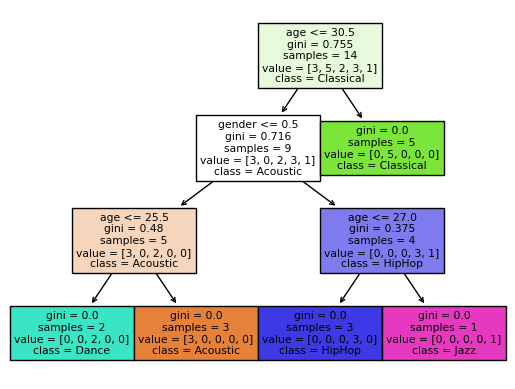

In [33]:
tree.plot_tree(model, feature_names = ['age', 'gender'],
                    class_names = sorted(Y.unique()),
                     filled = True)

In [34]:
# or 
tree.export_graphviz(model, out_file='music_rec.dot' , feature_names=['age','gender'],
                     class_names=sorted(Y.unique()),
                     label = 'all',
                     rounded=True,
                     filled=True
                     )